In [1]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(6)
import math
from collections import Counter

In [2]:
(X,y) =  make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.95,random_state=50)

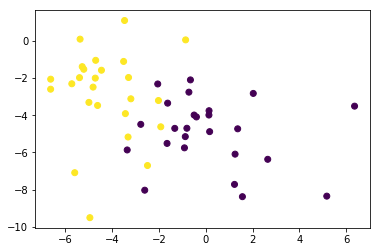

In [3]:
plt.scatter(X[:,0],X[:,1],marker='o',c=y)
plt.show()

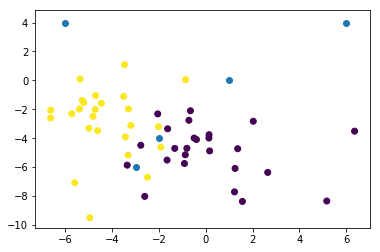

In [4]:
prediction_points=[[-2,-4],[-3,-6],[1,0],[6,4],[-6,4]]
prediction_points=np.array(prediction_points)

plt.scatter(X[:,0],X[:,1],marker='o',c=y)
plt.scatter(prediction_points[:,0],prediction_points[:,1],marker='o')
plt.show()

In [5]:
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

In [6]:
def predict(prediction_points,k):
    points_labels=[]
    
    for point in prediction_points:
        distances=get_eculidean_distance(point,k)
        
        results=[]
        for index in distances:
            results.append(y[index])
        
        label=Counter(results).most_common(1)
        points_labels.append([point,label[0][0]])
        
    return points_labels    

In [7]:
results=predict(prediction_points,10)
for result in results:
    print("Point = ",result[0])
    print("Class = ",result[1])
    print()

Point =  [-2 -4]
Class =  0

Point =  [-3 -6]
Class =  0

Point =  [1 0]
Class =  0

Point =  [6 4]
Class =  0

Point =  [-6  4]
Class =  1



In [8]:
#testing using the same data

In [9]:
results=predict(X,1)
predictions=[]
for result in results:
    predictions.append(result[1])
print(predictions)

[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]


In [10]:
y

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1])

In [11]:
#Calculating the accuracy
def get_accuracy(predictions):
    error=np.sum((predictions-y)**2)
    accuracy=100-(error/len(y))*100
    return accuracy

In [12]:
#for different K values 
acc=[]
for k in range(1,10):
    results=predict(X,k)
    predictions=[]
    for result in results:
        predictions.append(result[1])
    acc.append([get_accuracy(predictions),k])

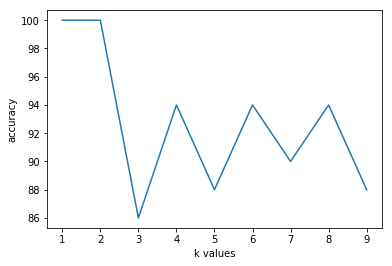

In [13]:
plotx=[]
ploty=[]
for a in acc:
    plotx.append(a[1])
    ploty.append(a[0])
    
plt.plot(plotx,ploty)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

Best K value is either 1 or 2